<a href="https://colab.research.google.com/github/kimje11/perceivedtemp/blob/master/MNIST%EC%86%90%EA%B8%80%EC%94%A8%EB%A1%9C_%EB%B3%B4%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

관련 라이브러리 설치

In [ ]:
!pip install keras
!pip install seaborn
!pip install opencv-python
!pip install matplotlib

# 인공지능이 손글씨를 구별하는 원리는 무엇일까?

**Q. 다음 중 무엇이 맞을까요?**

① 인공지능이  <font color='red'>그림</font>을 읽는다.       ② 인공지능이 <font color='red'>숫자</font>를 읽는다.

##손글씨 인식 처리과정

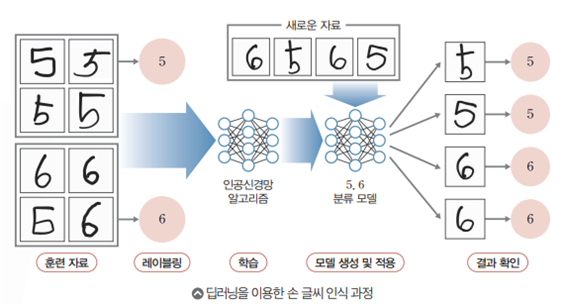 

⇒ 손 글씨를 인식하는 과정에서 집합, 행렬, 확률, 함수, 미분, 벡터 등 다양한 수학적 원리를 활용할 수 있습니다. 그 이유는 바로 이미지를 수로 표현할 수 있기 때문입니다.


## 좋은 훈련 자료: MNIST
(1) 딥러닝을 활용하여 어떠한 결과를 얻기 위해서는 양질의 데이터셋이 필요합니다. 딥러닝에서 숫자 인식에 가장 많이 활용하는 데이터셋이 바로 MNIST입니다. MNIST(Modified National Institute of Standards and Technology) 데이터베이스에는 숫자 이미지 70,000개가 들어있습니다. 그 중 60,000개는 학습용 데이터이고, 10,000개는 테스트용 데이터입니다. 

[참고] 

. 일반적으로 딥러닝은 데이터의 양이 많을 수록 좋습니다. 많은 양의 데이터를 학습하려면 컴퓨터는 수많은 연산을 해야되므로 높은 성능을 요구하게 됩니다. 최근 컴퓨터 성능의 발달로 딥러닝은 더욱 발전하게 되었습니다.

. 학습용 데이터와 테스트용 데이터는 무엇일까요?
학습용 데이터는 모델을 훈련시키는 자료라고 생각하면 됩니다. 모델이 학습용 데이터를 통해 학습을 하게되면 실제 어느 정도 성능을 보이는지 테스트를 해야하는데 바로 테스트용 데이터를 통해 성능을 점검하게 됩니다. 현재 딥러닝 기법들 중에서 MNIST 데이터셋에 대한 정확도 1위는 2020년 기준 99.91%라고 합니다.

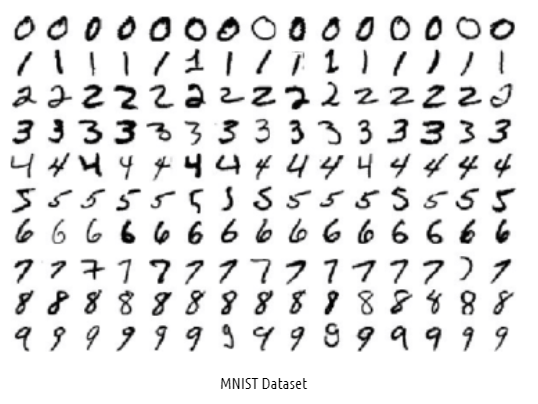

(2) MNIST의 이미지 데이터는 28X28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취합니다. 각 이미지에는 그 이미지가 실제 의미하는 숫자가 레이블(정답)로 붙어있습니다. MNIST를 활용할 줄만 안다면 우리는 훈련 데이터셋을 모으고 레이블링을 하는 번거로움을 줄이고 수학적 알고리즘을 활용하여 학습을 시켜 실제 레이블과 거의 일치하는 모델을 만드는 과정만 하면 됩니다. 실제로 파이썬 언어에서 딥러닝 프레임워크로 유명한 Keras, Pytorcch에서도 활용되고 다른 언어 프로그램에서도 숫자 인식 프로그래밍을 할 때 MNIST를 주로 활용합니다.

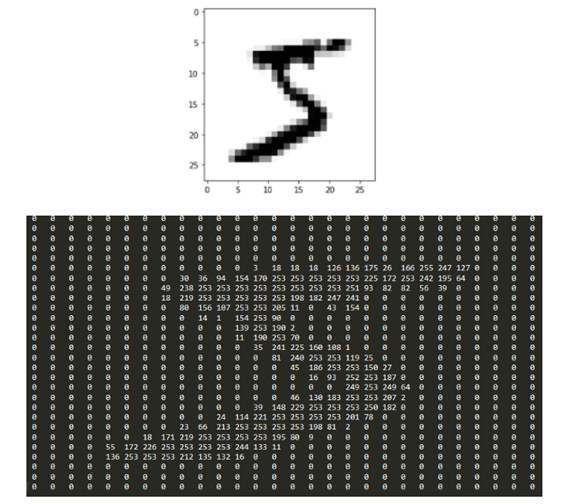

## 직접 훈련 자료(데이터셋) 만들어 보기

* 앞에서 말했듯이 양질의 훈련자료(데이터셋)가 있으면 분류하는 성능이 더욱 향상됩니다. 양질의 훈련자료를 만들기 위해서는 데이터 전처리 과정을 거칩니다.여기서 데이터 전처리는 필요 없는 데이터를 제거하고 가공하고 정리하는 과정을 말하는데 이미지 데이터 전처리 과정은 주로 랜덤 노이즈(변색, 빛반사, 잡티, 흐림 등등)를 찾아내 다음 처리를 원만하게 할 수 있도록 필터를 사용합니다. 구체적인 전처리는 다음과 같은 방법들이 있습니다.

 * 그레이 처리: 인식과정 들어가기전 인식 정보와 무관한 데이터를 희석하기 위해 이미지를 그레이화 한다.(교과서에서는 회색조라고 표현합니다.)
 * 이진화: 데이터를 더 줄이고 이미지 인식을 용이하게하기 위해 전 과정에서 받아온 그레이 이미지를 이진화 시킨다.(교과서에서는 0, 1로 이미지를 행렬로 표현하는데 이렇게 두개의 값으로 표현하는 것을 말합니다.)
 * 스무딩: 필기 이미지의 노이즈를 제거하기 위해 필기 이미지를 부드럽게 하고 노이즈를 줄이는 처리를 한다.
 * 문자 분할: 문자 인식의 기본 목표는 단일 문자이다. 문자 인식을 하기 전에 스무딩과 노이즈 감소로 처리 된 이미지를 분할하고, 멀티 라인 및 멀티 문자 이미지에서 단일 문자를 얻어 낸다.

[참고]

. 데이터 전처리 과정은 가장 중요하면서 데이터 과학자들이 가장 많은 시간을 소요하는 일입니다.

. 대이터 전처리 단계는 데이터 수집, 정제, 통합, 축소, 변환의 과정을 거칩니다.

### 1단계: 데이터 수집
  아래와 같이 0부터 9까지 순서대로 10개씩 100개의 숫자를 직접 작성하고 사진을 찍어 업로드를 해봅니다.
  
[참고] 그림판을 이용해도 됩니다.

  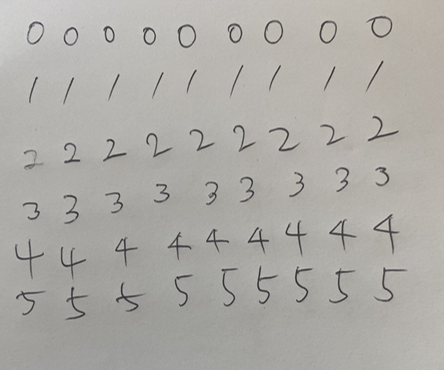

#### 이미지 업로드하기

In [ ]:
# 파일 업로드 기능 실행
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()  

# 업로드된 파일 정보 출력
for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

#사진을 객체로 저장하기
img = cv2.imread([fn for fn in uploaded.keys()][0])

Saving dataset.jpg to dataset (3).jpg
User uploaded file "dataset.jpg" with length 1907901 bytes


### 2단계: 데이터 정제

* 여기서는 그레이, 이진화 처리를 하고 28*28의 이미지로 만드는 프로그래밍을 해보겠습니다.

##### 그레이 처리

* 흰색과 검은 색 사이에 다양한 명도를 가지는 색으로 구성하는 것을 말하며, 회색조라 부르기도 합니다.
* 각 픽셀은 0부터 255 사이의 정수의 값을 가집니다.
* 가장 어두운 픽셀은(검은색)과 가장 밝은 픽셀(흰색)을 0과 255로 표현합니다.(행렬 처리에 많이쓰이는 Numpy 라이브러리는 반대로 표현합니다.)

업로드 이미지: (4032, 3024, 3)
그레이 이미지: (4032, 3024)


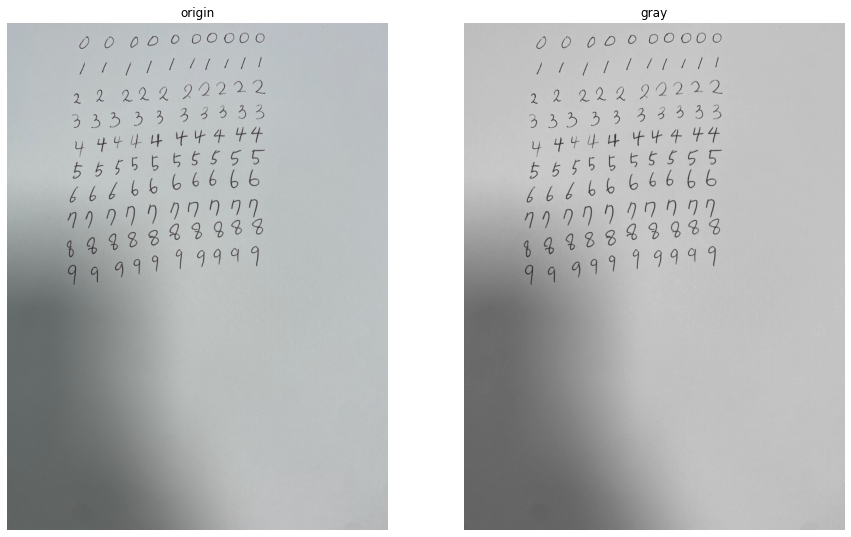

In [ ]:
import cv2
import numpy as np
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #BRG채널을 GRAY채널로 바꾸기

plt.figure(figsize=(15,12))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('origin')

plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('gray')
print("업로드 이미지:", img.shape) #(가로 픽셀수, 세로 픽셀수, 채널수)
print("그레이 이미지:", gray.shape) #(가로 픽셀수, 세로 픽셀수)

###### 픽셀값 분포를 히스토그램으로 보기

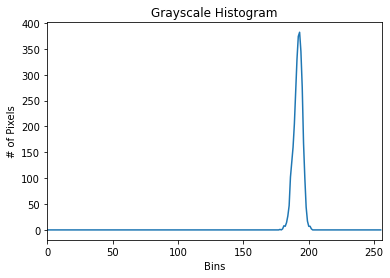

In [ ]:
hist = cv2.calcHist(gray,[1],None,[256], [0,256] )
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

##### 이진화(binary) 처리

이진화 처리는 회색조(그레이 처리된 이미지)의 특정 임계값(threshold)에 따라 임계치 이상은 검은색으로 작으면 흰색으로 표현하는 것을 말합니다. 외곽선 검출을 할 때 이진화 처리를 하면 어느 정도의 노이즈를 제거할 수 있어 효과적입니다.

[참고]

. 컬러 영상이나 이미지는 이진화할 수가 없습니다.

. 임계치 이상을 흰색으로 작으면 검은색으로 표현할 수도 있습니다.


(4032, 3024)


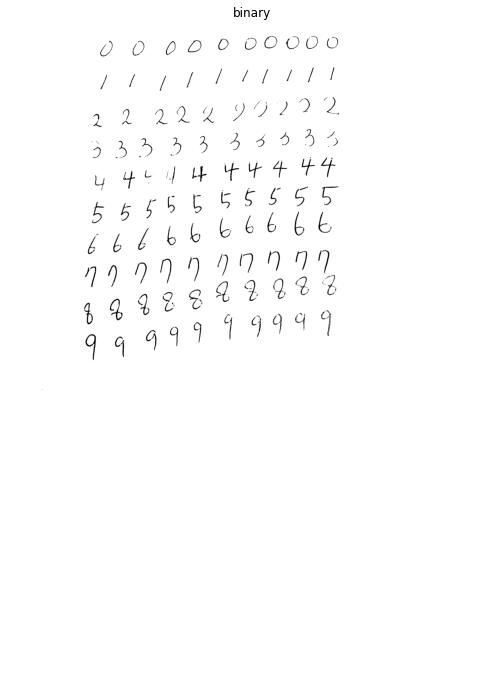

In [ ]:
# import pandas as pd
ret, binary = cv2.threshold(gray, 81, 255, cv2.THRESH_BINARY) #여기서 임계값은 127로 처리하였습니다.
plt.figure(figsize=(15,12)) # 가로 15인치, 세로 12인치로 그림 그리기
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.title('binary')
print(binary.shape)


##### 윤곽선 검출하기

* 윤곽선 검출을 할 때는 글자를 흰색, 배경을 검은색으로 이진화하면 검출 성능이 더 좋습니다.

(1344, 1008)


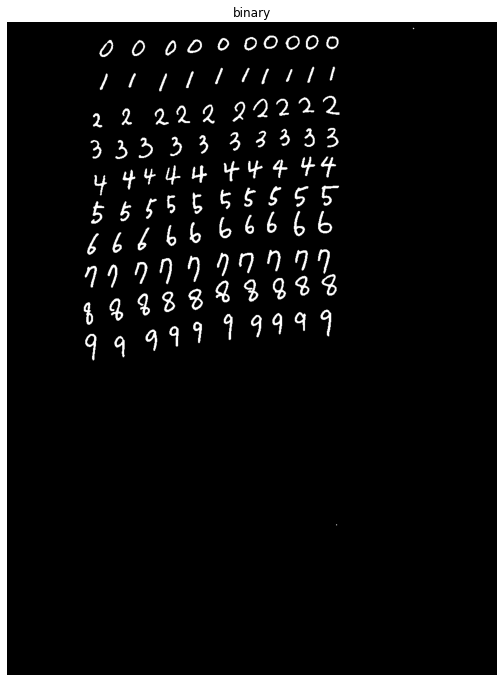

In [ ]:
img_resize = img.copy()
img_resize = cv2.resize(img_resize , (int(img.shape[1]/3),int(img.shape[0]/3)))
gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5, 5),0)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 10)
plt.figure(figsize=(15,12))
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.title('binary')
print(binary.shape)

[(677, 1034, 2, 2), (221, 646, 21, 44), (161, 642, 23, 55), (285, 633, 24, 44), (334, 626, 19, 42), (383, 617, 18, 44), (502, 603, 22, 46), (446, 601, 18, 54), (546, 599, 20, 44), (592, 597, 23, 39), (645, 592, 22, 55), (158, 577, 19, 46), (211, 569, 28, 46), (268, 558, 26, 46), (319, 555, 27, 42), (373, 549, 30, 44), (429, 532, 29, 45), (487, 530, 30, 46), (547, 527, 27, 44), (593, 522, 29, 41), (647, 519, 31, 44), (160, 502, 25, 45), (207, 499, 20, 48), (263, 494, 26, 45), (314, 486, 26, 54), (372, 481, 25, 54), (477, 475, 31, 42), (432, 475, 24, 48), (593, 469, 26, 43), (535, 469, 28, 44), (639, 468, 25, 50), (165, 435, 24, 44), (217, 433, 19, 42), (269, 423, 24, 47), (328, 418, 20, 43), (376, 412, 23, 43), (437, 401, 25, 44), (490, 397, 18, 39), (535, 390, 20, 44), (640, 389, 29, 46), (590, 389, 23, 52), (233, 369, 23, 41), (173, 369, 27, 46), (286, 363, 22, 42), (329, 357, 17, 37), (382, 351, 20, 44), (439, 345, 22, 40), (488, 341, 24, 39), (592, 338, 28, 43), (538, 338, 26, 40), 

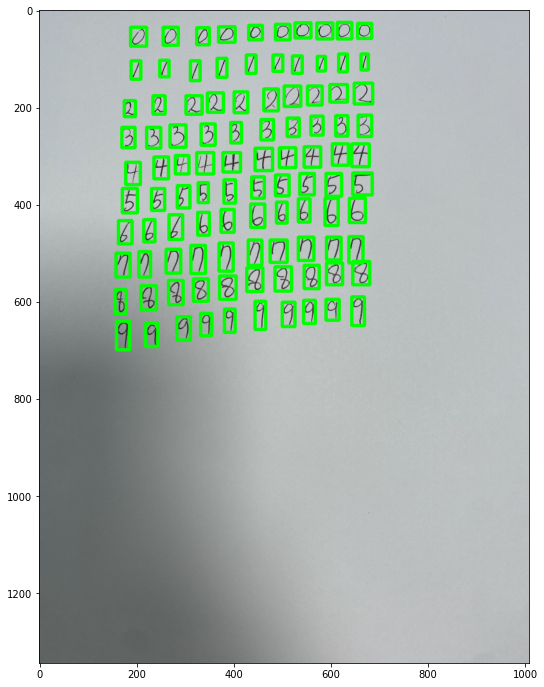

In [ ]:
import cv2

img2 = img.copy()
img2 = cv2.resize(img2 ,(int(img.shape[1]/3),int(img.shape[0]/3)))
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
binary = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 10)
# ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)
contours, hierachy= cv2.findContours(binary,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
print(rects)
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>10)and(w*h<10000))]
print('검출갯수',len(rects))

img_result = []
img_for_class = img2.copy()

margin_pixel = 2

for rect in rects:
    #[y:y+h, x:x+w]
    target_num = img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel,
                               rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel]
    img_result.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
    # Draw the rectangles
    cv2.rectangle(img2, (rect[0]-margin_pixel, rect[1]-margin_pixel), 
                    (rect[0] + rect[2]+margin_pixel, rect[1] + rect[3]+margin_pixel), (0, 255, 0), 5) 
      
plt.figure(figsize=(15,12))
plt.imshow(img2)

##### 이미지를 분할하여 사이즈 28*28로 조정하기

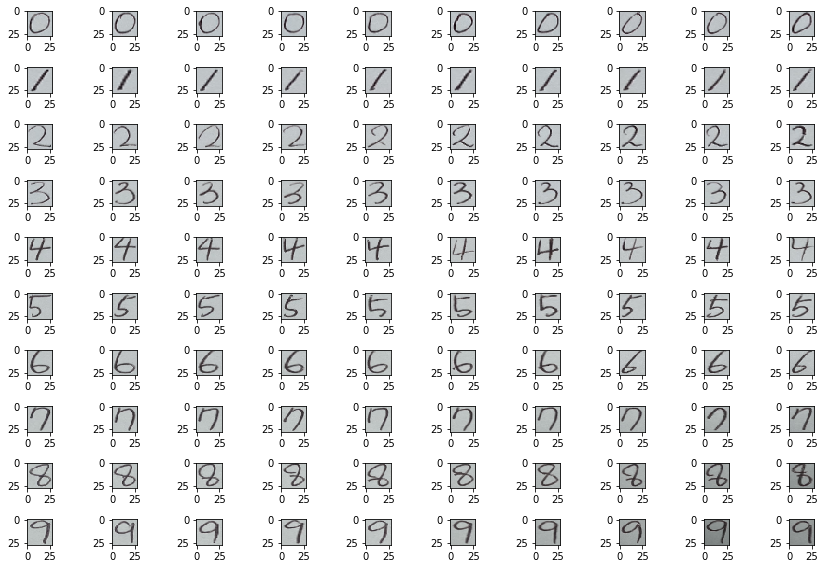

In [ ]:
import math

count = 0
ncols = 10
nrows = math.ceil(len(img_result)/10)
plt.figure(figsize=(12,8))

img_sort = img_result.reverse()
for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

##### 이미지 파일에 레이블링하여 저장하기

* 분할된 이미지 파일명에 레이블링을 하여 저장하면 티처블 머신 같은 프로그램을 이용하여 머신러닝을 활용할 수 있습니다.
* 데이터셋을 하나의 파일로 묶어 저장하기도하고 아래 사진처럼 csv파일에 레이블과 함께 저장하여 활용하기도 합니다.

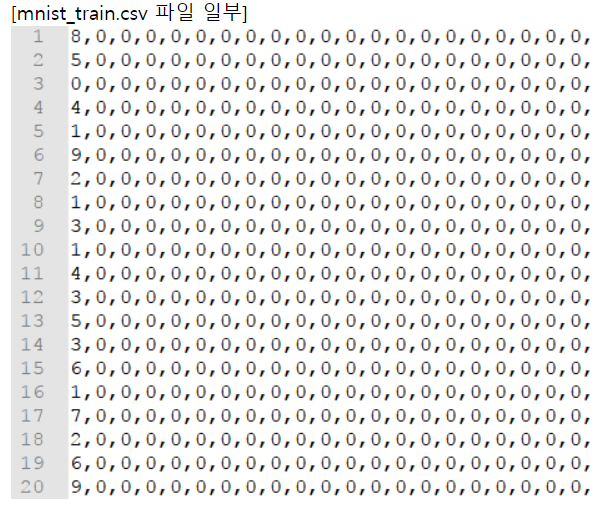

In [ ]:
from os import path 
from google.colab import drive
import shutil
from google.colab import files

notebooks_dir_name = 'notebooks'
drive.mount('/content/gdrive') 
notebooks_base_dir = path.join('./gdrive/My Drive/', notebooks_dir_name)
if not path.exists(notebooks_base_dir): 
     print('check google drive')

count = 1
digit = 0
for i in range(0,len(img_result)) :
  if (count%10) == 0:
    digit += 1 
    count = 0
  cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/'+str(digit)+'_'+str(count)+'.png',img_result[i])
  count += 1

shutil.make_archive('dataset','zip', '/content/gdrive/MyDrive/Colab Notebooks/')
files.download('dataset.zip') 

## 분류모델의 수학적 원리

* 머신러닝의 학습방법 중 지도학습에는 분류 모델과 회귀 모델이 있는데, 이미지 인식에서는 분류 모델을 사용합니다. 유사한 정도에 따라 분류하는 경우에는 <font color='red'>해밍거리</font>를, 가능성의 정도에 따라 분류하는 경우에는 <font color='red'>퍼셉트론</font>을 이용합니다.

 (1) 해밍거리: 배열이 다른 성분의 합
 
 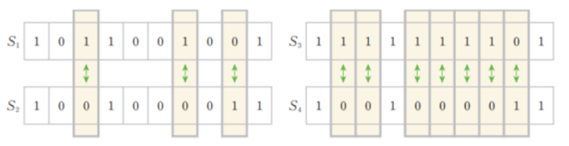

 ⇒ 일반적으로 해밍거리가 0에 가까울수록 두 문자열 사이의 유사도가 높다고 판단하며, 해밍거리는 이산데이터에 대한 지도학습의 분류 알고리즘인 KNN(k-nearest neighbor) 모델의 기본원리입니다.

 (2) 퍼셉트론: 인공신경망(인간의 신경 세포를 수학적 모델링 한 것)에서 정보를 전달하는 기본 단위

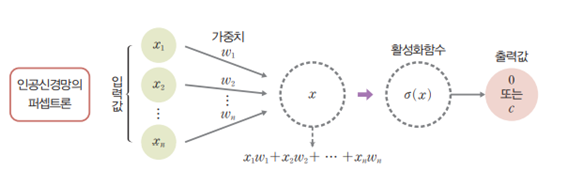

   ⇒ 퍼셉트론으로 입력되는 값에 가중치를 각각 곱하여 더한 값이 임곗값 보다 작으면 퍼셉트론은 0을 출력하고, 임곗값 이상이면 퍼셉트론은 0이 아닌 상수 를 출력합니다. 이러한 기능을 하는 함수를 딥러닝에서는 활성화함수라 부릅니다.

  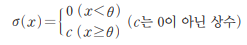


  이러한 수학적 원리가 딥러닝에 사용되는 모든 프레임워크의 기본 원리이며 머신러닝의 지도학습, 비지도학습, 강화학습 모든 곳에 적용됩니다.

### 1.해밍거리로 숫자 분류하기

* MNIST 학습용 데이터를 평균값을 기준으로 이진화를 시켜보겠습니다.

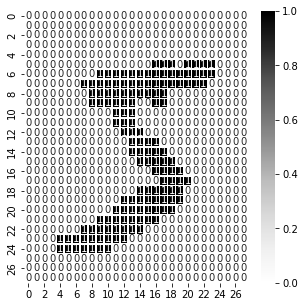

In [ ]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import seaborn as sns

def img2hash(img):
    # gray = cv2.resize(img, (28, 28))
    avg = img.mean()
    bi = 1 * (img > avg)
    return bi

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() 

X_train_copy = X_train
for i in range(len(X_train)):
  X_train_copy[i]=img2hash(X_train[i])

plt.figure(figsize = (5,5)) #보이는 사이즈 크기
#첫번째 데이터셋 보기
ax = sns.heatmap(X_train_copy[0],
                 vmin = 0, #최솟값
                 vmax = 1, #최댓값
                 cbar = True, #컬러바 설정
                 center = 0.5, #중앙값
                 linewidths = 0.5, #셀사이 간격
                 annot =True, annot_kws = {'size':10}, #셀에 값 표기, 셀안에 값 크기
                 fmt = 'd', #정수로 표현
                 cmap='Greys' ) #히트맵 색 설정


#### 숫자 이미지 파일 업로드하기

In [ ]:
# 파일 업로드 기능 실행
from google.colab import files

uploaded = files.upload()  

img = ""
# 업로드된 파일 정보 출력
for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    img = fn

Saving 2.png to 2 (6).png
User uploaded file "2.png" with length 937 bytes


#### 해밍거리 알고리즘으로 예측해보기

예측 숫자(k=5): 2
해밍거리 최단순서
1번째 거리 숫자: 2[해밍거리: 61]
2번째 거리 숫자: 2[해밍거리: 62]
3번째 거리 숫자: 2[해밍거리: 63]
4번째 거리 숫자: 2[해밍거리: 66]
5번째 거리 숫자: 2[해밍거리: 66]


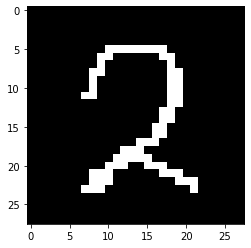

In [ ]:
import numpy as np
def check_hamming(hash, train):
    hamming_list=[ ]
    for i in train:
        avg = i.mean()
        bi = 1 * (i>avg)
        i= bi.reshape(28,28)
        distance = (hash!=i).sum()
        hamming_list.append(distance)
    return hamming_list

def most_frequent(data):
    count_list=[]
    #count를 담을 리스트 변수 설정
    for x in data: 
        count_list.append(data.count(x))
        #append를 사용하여서 크기를 미리 정하지 않고 초기화 가능
    return data[count_list.index(max(count_list))]

def img2hash(img):
    # gray = cv2.resize(img, (28, 28))
    avg = img.mean()
    bi = 1 * (img < avg)
    return bi

img = cv2.imread(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
hash_img = img2hash(gray)
hamming_list= check_hamming(hash_img, X_train)

hamming_sorted = sorted(hamming_list)
pos = []
for i in hamming_sorted[:5]:
    pos_i = np.where(np.array(hamming_list)==i)[0]
    if pos==[]:
        pos.extend(pos_i)
    elif pos[-1] == pos_i[-1]:
        pass
    else:
        pos.extend(pos_i)
        if len(pos)>5:
            pos = pos[:5]

hamming_predict = []
for i in pos:
    hamming_predict.append(y_train[i])
plt.imshow(hash_img, cmap='gray')
print("예측 숫자(k=5):",most_frequent(hamming_predict))
hamming_predict = np.array(hamming_predict).reshape(-1,5)
print('해밍거리 최단순서')
for i,j in enumerate(hamming_predict[0]):
  print(f'{i+1}번째 거리 숫자: {j}[해밍거리: {np.array(hamming_sorted[:5]).reshape(-1,5)[0][i]}]')

#### 유클리드 거리를 활용한 KNN알고리즘으로 예측해보기

* 머신러닝에서 많이 활용되는 KNN알고리즘은 유클리드 거리를 이용하여 최단 거리 K개 중 가장 많이 포함된 숫자를 답으로 예측합니다. MNIST를 이용하면 784차원(28*28)의 유클리드 거리값을 구합니다.

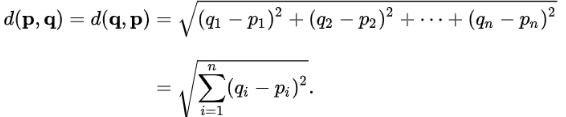

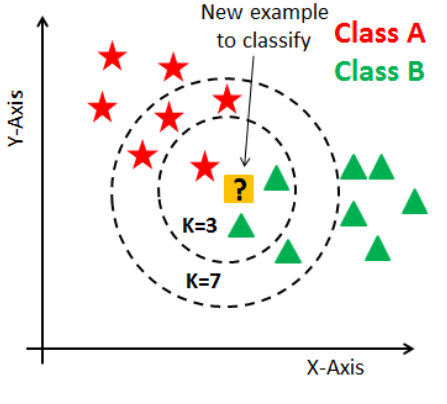

In [ ]:
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# 학습용 60,000개 / 검증용 10,000개
# 손글씨 한장 이미지는 28X28 = 784개 pixel
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 28X28 배열을 1차원 784개로 재배열
# 5000개로 테스트 수행
x_train = x_train.reshape(60000, 28*28)
# y_train = y_train[:50000]
x_test = x_test.reshape(10000,28*28)
# y_test = y_test[:5000]

from sklearn.neighbors import KNeighborsClassifier


# for k in range(1, 11):
#   knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
#   knn.fit(x_train, y_train)
#   score = knn.score(x_test, y_test)
#   print('k: %d, accuracy: %.2f' % (k, score*100))

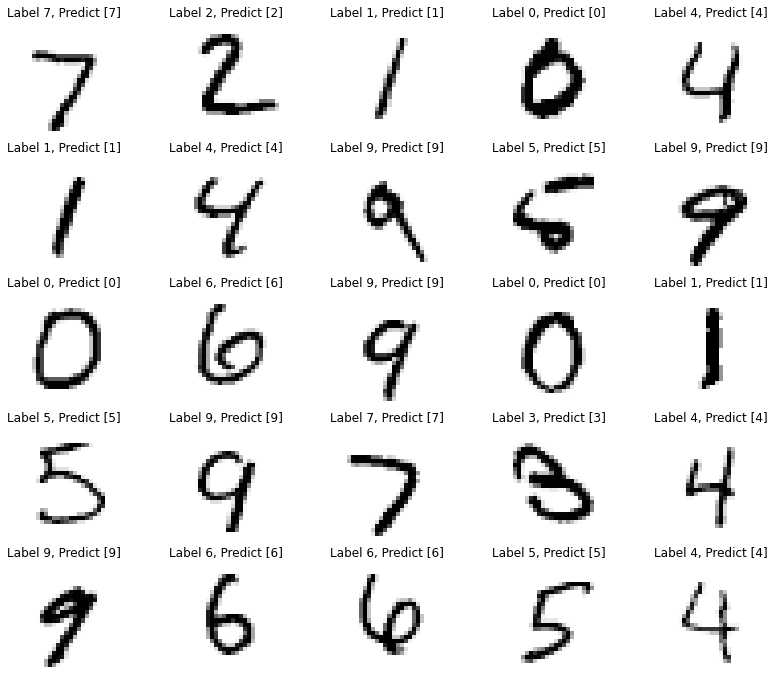

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_train, y_train)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(x_test[:25]):
    plt.subplot(5,5, idx + 1)
    plt.imshow(n.reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[idx]) + ', Predict ' + str(knn.predict(x_test[idx].reshape(-1,784))))
    plt.axis('off')
    

### 2.퍼셉트론으로 숫자 분류하기


####1단계: MNIST데이터 불러오기

In [ ]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() 
# keras 라이브러리에 저장되어있는 mnist 학습용 데이터와 레이블, 테스트 데이터와 레이블 객체로 저장하기
# 여기서 학습용 데이터와 레이블은 X_train, y_train, 테스트 데이터와 레이블은 X_test, y_test로 설정하였습니다.



##### MNIST 학습용 데이터 두번째 이미지와 픽셀 값 보기

첫번째 학습용 데이터 레이블값 :  5


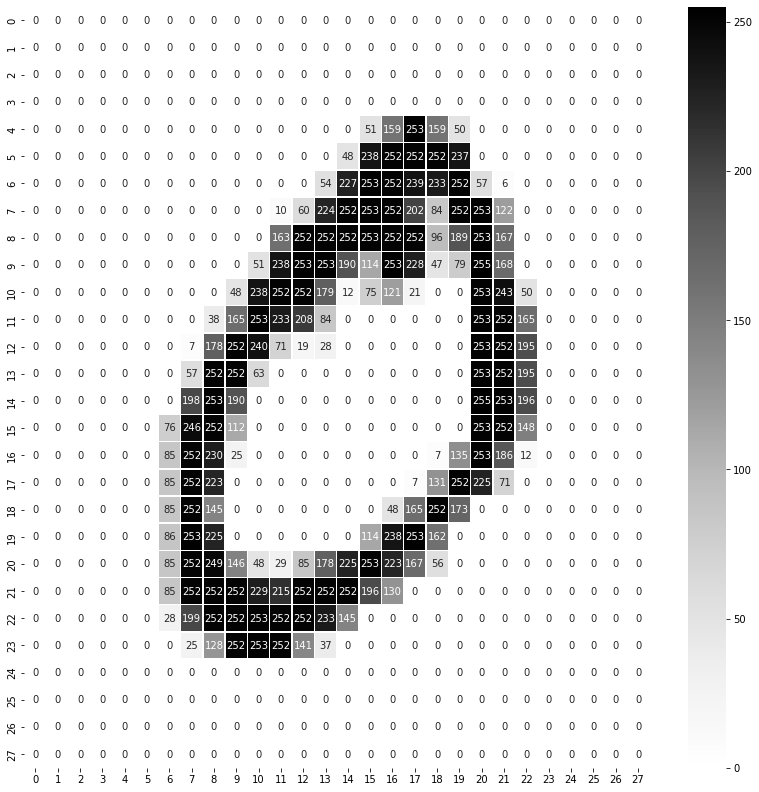

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("첫번째 학습용 데이터 레이블값 : ",  y_train[0])
# plt.imshow(X_train[0], cmap=plt.cm.gray_r, interpolation = "nearest")

plt.figure(figsize = (14,14))
ax = sns.heatmap(X_train[1],
                 vmin = 0, #최솟값
                 vmax = 255, #최댓값
                 cbar = True, #컬러바 설정
                 center = 127.5, #중앙값
                 linewidths = 0.5, #셀사이 간격
                 annot =True, annot_kws = {'size':10}, #셀에 값 표기, 셀안에 값 크기
                 fmt = 'd', #정수로 표현
                 cmap='Greys' ) #히트맵 색 설정

##### 확률값으로 바꾸기

* 255.0으로 나눠준 이유는 이미지가 0 ~ 255 사이의 값을 가지고 있어서, 학습하기 좋은 형태로 만들기 위해 대표적으로 0~1 사이의 값으로 정규화(Normalization)를 진행합니다. Feature 간에 스케일 조정 그리고 학습속도에 영향을 줍니다. 
* 이 예제에서 정규화 진행 여부에 따라 예측률이 87% 에서 92% 로 올라갑니다.

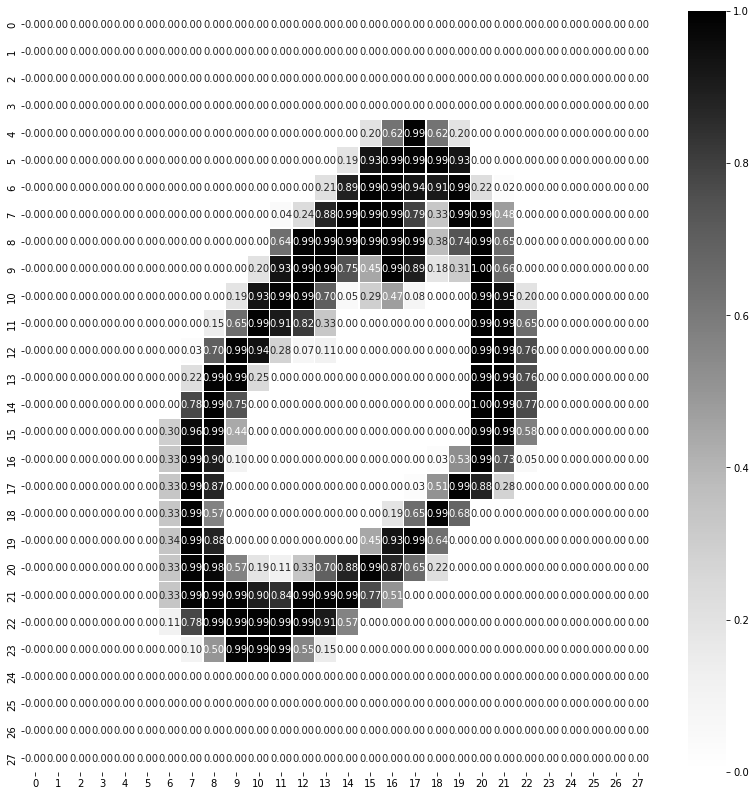

In [ ]:
c=0
if c==0:
  X_train, X_test = X_train / 255.0, X_test / 255.0
  c += 1
plt.figure(figsize = (14,14))
ax = sns.heatmap(X_train[1],
                 vmin = 0, #최솟값
                 vmax = 1, #최댓값
                 cbar = True, #컬러바 설정
                 center = 0.5, #중앙값
                 linewidths = 0.5, #셀사이 간격
                 annot =True, annot_kws = {'size':10}, #셀에 값 표기, 셀안에 값 크기
                 fmt = '.2f', #정수로 표현
                 cmap='Greys' ) #히트맵 색 설정

#### 2단계: 예측모델 생성 및 학습


##### 1) 로지스틱 회귀, 통계적인 방법으로 접근하기(단일층)

*   로지스틱 회귀를 이용하여 이미지 데이터를 총 784개(28*28)를 독립변수로 가정하고 숫자를 0~9까지 분류하도록 학습모델을 만들어봅시다.


In [ ]:
import tensorflow as tf
from tensorflow import keras


X_train = X_train.reshape(60000, 784).astype("float32")
X_test = X_test.reshape(10000, 784).astype("float32")
# one - hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
600/600 [==============================] - 5s 4ms/step - loss: 0.6273 - accuracy: 0.8428 - val_loss: 0.3632 - val_accuracy: 0.9053
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3471 - accuracy: 0.9061 - val_loss: 0.3098 - val_accuracy: 0.9147
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3097 - accuracy: 0.9142 - val_loss: 0.2898 - val_accuracy: 0.9202
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2923 - accuracy: 0.9187 - val_loss: 0.2809 - val_accuracy: 0.9223
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2818 - accuracy: 0.9211 - val_loss: 0.2749 - val_accuracy: 0.9228
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2747 - accuracy: 0.9239 - val_loss: 0.2713 - val_accuracy: 0.9240
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2695 - accuracy: 0.9251 - val_loss: 0.2673 - val_accuracy: 0.9247
Epoch 

######학습결과

학습된 모델은 새로운 숫자이미지에 대해 92% 예측률을 보입니다.
이 간단한 코드로도 숫자이미지를 10개중 9개를 정확히 분류할 수 있는 대단한 예측모델이 만들어졌습니다. 하나의 픽셀을 단순히 변수로 가정하고 회귀모델을 구성하여도 꽤 괜찮은 학습결과가 나타납니다.

##### 2) 신경망(NN: neural network)

이전 모델에서는 하나의 레이어로 모델을 생성했습니다. 실제 하나의 레이어로는 XOR 문제도 분류해내지 못합니다. 레이어를 여러층을 두는 딥러닝으로 시도해봅시다. 데이터 전처리나 모든 파라미터들은 동일하고 학습모델만 변경합니다.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=256, input_dim=784, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


600/600 [==============================] - 4s 6ms/step - loss: 0.2810 - accuracy: 0.9178 - val_loss: 0.1250 - val_accuracy: 0.9601
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9679 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0713 - accuracy: 0.9790 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0861 - val_accuracy: 0.9743
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0870 - val_accuracy: 0.9735
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0723 - val_accuracy: 0.9802
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.1093 - val_accuracy: 0.9684
Epoch 8/10
600/60

###### 학습결과

딥 뉴럴 네트워크로 학습된 모델은 97% 예측률을 보입니다. 이를 통해 레이어를 여러층 두는 딥네트워크를 구성하는 것만으로도 학습 효과가 좋음을 알 수 있습니다.

##### 3) 합성곱 신경망(CNN: Convolution neural network)

* 영상처리에서 사용하는 컨볼루션(합성곱)이라는 연산이 있습니다. 전 방식과 동일하게 딥 네트워크를 구성하지만 컨볼루션 연산을 통과한 새로운 이미지는 이미지의 경계선을 뽑거나 흐리게 만들거나 하는 등 다양한 특징을 뽑아낼 수 있습니다. 학습 네트워크 상에서 이 컨볼루션 연산을 어떻게 해야되는지 또한 학습을 통해 찾게 됩니다. 이러한 구성을 가진 CNN은 영상인식에서 뛰어난 성능을 보입니다. 특히 딥러닝이 가장 강력하게 힘을 발휘하는 곳이 영상인식 분야이기도 합니다.

* 딥러닝을 발표하며 신경망의 부흥을 이끈 제프리 힌튼 교수팀이 이미지 인식 대회인 ImageNet(이미지넷) 대회에서 딥러닝 기반 모델인 AlexNet 모델을 사용해 놀라운 성능으로 우승했는데 이때 사용한 알고리즘이 CNN입니다.
<img src="https://devopedia.org/images/article/172/9880.1559385994.png">

합성곱신경망을 이용한 이미지 분류 방식

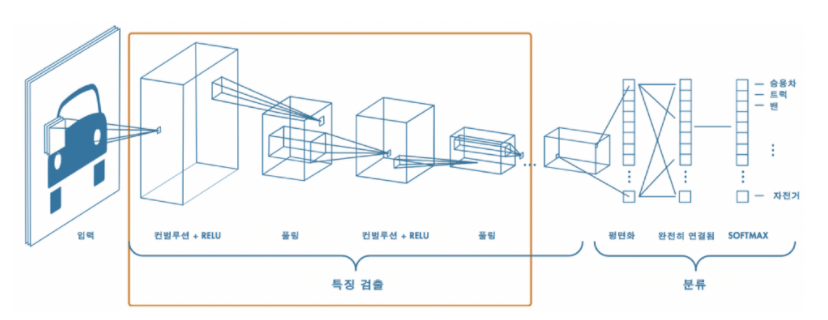

###### CNN은 가중치를 어떻게 부여할까?
패턴을 찾아주는 컨볼루션(Convolution) : 특정 패턴이 있는지 박스로 훑으며 마킹하는 것으로 위아래, 좌우, 대각선 필터 등 각종 필터로 특징이 그림위에 있는지 확인합니다.

[참고] 필터를 커널, 마스크라고도 부릅니다.

<img src='https://user-images.githubusercontent.com/60168331/97574899-3e8ac900-1a2f-11eb-8a7c-7e9a9a661611.gif'>

중요한 정보를 찾아주는 풀링(Pooling): 그림의 사이즈를 점진적으로 줄이는 법으로 많이 쓰이는 MaxPooling은 n*n필터 안의 가장 큰값을 중요한 정보로 보고 한개로 줄이는 것을 말합니다. 즉, 풀링은 가장 중요한 정보는 남기고 차원을 줄이는 것으로 물체의 위치와 각도 변화에 잘 대응할 수 있게 합니다.

<img src='https://user-images.githubusercontent.com/60168331/97576192-303dac80-1a31-11eb-8269-96affc0ec614.png'>

이외에도 padding, drop out, 활성화함수 Relu함수를 이용하여 특징을 잘 추출할 수 있도록 하는데, 어떻게 설정하느냐(이 부분은 사람이 결정하는 변수라고 하여 초매개변수[hyperparameter]라고 부릅니다.)에 따라 예측률의 차이를 불러옵니다.  
일반 신경망의 경우, 이미지 전체를 하나의 데이터로 입력하기 때문에 이미지의 위치가 약간 변형되거나 왜곡된 경우 올바른 성능을 기대할 수 없지만 CNN은 이미지를 하나의 데이터가 아닌, 여러 개로 분할하여 처리하기 때문에 왜곡되더라도 이미지의 부분적 특성을 추출할 수 있어 올바른 성능을 낼 수 있습니다.

우리는 정확한 예측을 하기 위한 위의 모든 방법들이 수학과 밀접히 연결되있다는 것을 알 수 있습니다.

딥러닝 보충 영상 보기

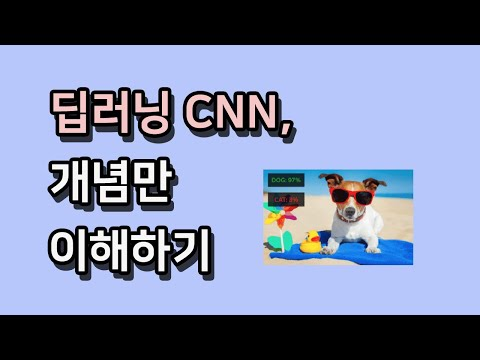

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9Cu2UfNO-gw')

###### 코드 실행

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_seed(1234)

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
600/600 [==============================] - 24s 17ms/step - loss: 0.1895 - accuracy: 0.9409 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 2/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0388 - accuracy: 0.9894 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0313 - accuracy: 0.9914 - val_loss: 0.0207 - val_accuracy: 0.9933
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0206 - val_accuracy: 0.9941
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0231 - accuracy: 0.9936 - val_loss: 0.0222 - val_accuracy: 0.9934
Epoch 7/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0209 - accuracy: 0.9942 - val_loss: 0.0208 - val_accuracy:

###### 학습결과

새로운 이미지에 대해 99.5%로 숫자를 분류해내는 모델을 만들었습니다. 이것처럼 CNN을 이용한 딥러닝 네트워크는 이미지 인식에서 뛰어난 성능을 보임을 알 수 있습니다.

###### 데이터 예측

In [ ]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
print(predicted_labels[:10])


NameError: ignored

###### 틀린 데이터만 모으기

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() 
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

NameError: ignored

#### 3단계: 모델 생성 및 적용

##### 1) 모델 저장하기

딥러닝 모델은 일반적으로 h5 확장자를 가집니다.

In [ ]:
from google.colab import files
model.save('MNIST_CNN_model.h5')
files.download('MNIST_CNN_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### 2) 모델 적용하기

###### 학습모델 업로드하기

In [ ]:
# 파일 업로드 기능 실행
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()  

model_name = ""
# 업로드된 파일 정보 출력
for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    model_name = fn
model_name

Saving MNIST_CNN_model.h5 to MNIST_CNN_model.h5
User uploaded file "MNIST_CNN_model.h5" with length 2986936 bytes


'MNIST_CNN_model.h5'

###### 내가 쓴 손글씨 예측하기

* 이미지 업로드

In [ ]:
# 파일 업로드 기능 실행
from google.colab import files
import cv2
import matplotlib.pyplot as plt

predict_img = ""
uploaded = files.upload()  

# 업로드된 파일 정보 출력
for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predict_img = fn

Saving 11.jpg to 11 (1).jpg
User uploaded file "11.jpg" with length 2112809 bytes


검출갯수 0


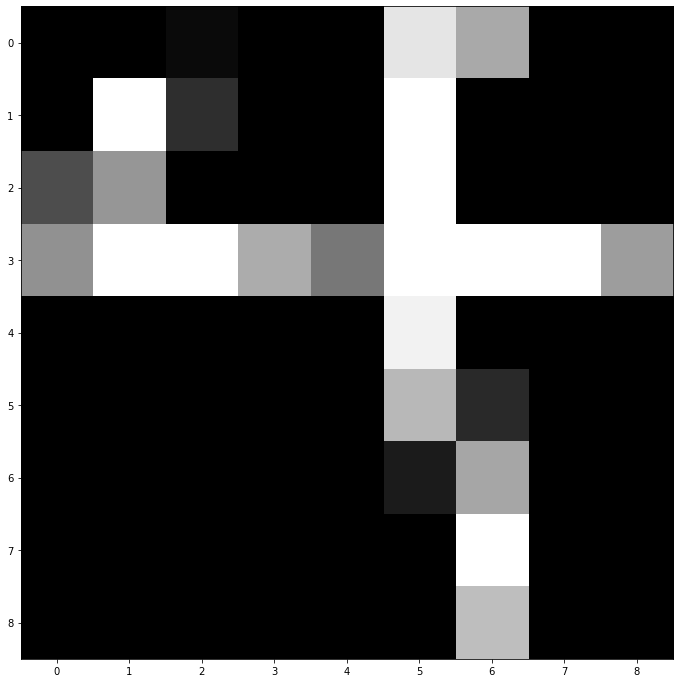

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model(model_name)

def process(img_input):
    gray = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    (thresh, img_binary) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    w, h = img_binary.shape
    ratio = 100/h
    new_h = 100
    new_w = w * ratio
    img_empty = np.zeros((110,110), dtype=img_binary.dtype)
    img_binary = cv2.resize(img_binary, (int(new_w), int(new_h)), interpolation=cv2.INTER_AREA)
    img_empty[:img_binary.shape[0], :img_binary.shape[1]] = img_binary
    img_binary = img_empty
    cnts = cv2.findContours(img_binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 컨투어의 무게중심 좌표를 구합니다. 
    M = cv2.moments(cnts[0][0])
    center_x = (M["m10"] / M["m00"])
    center_y = (M["m01"] / M["m00"])

    # 무게 중심이 이미지 중심으로 오도록 이동시킵니다. 
    height,width = img_binary.shape[:2]
    shiftx = width/2-center_x
    shifty = height/2-center_y

    Translation_Matrix = np.float32([[1, 0, shiftx],[0, 1, shifty]])
    img_binary = cv2.warpAffine(img_binary, Translation_Matrix, (width,height))
    img_binary = cv2.resize(img_binary, (28, 28), interpolation=cv2.INTER_AREA)
    flatten = img_binary.flatten() / 255.0
    return flatten

def filter(img_input):
  img = cv2.resize(img_input, (28,28), interpolation=cv2.INTER_AREA)
  flatten = img.flatten() / 255.0
  return flatten   

# img = cv2.imread(predict_img)
img = cv2.imread('4_3.png')
img_resize = cv2.resize(img.copy() ,(int(img.shape[1]/3),int(img.shape[0]/3)))
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
binary = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 10)
# ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)

contours, hierachy= cv2.findContours(binary.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
# tmp = [w*h for (x,y,w,h) in rects]
# tmp.sort()
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>60)and(w*h<50000))]
print('검출갯수',len(rects))

img_result = []
img_for_class = img_resize

edge_pixel = 10
margin_pixel = 5

for rect in rects:
    # target_num = img_for_class[rect[1] : rect[1]+rect[3],
    #                            rect[0] : rect[0]+rect[2]]
    target_num = img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel,
                               rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel]
    # test_num = cv2.resize(target_num, (28,28),interpolation=cv2.INTER_AREA)[:,:,1]
    # target_num = (target_num < 70) * target_num
    # test_num = test_num.astype('float32') / 255.
    # test_num = test_num.reshape(-1,784)
    # res = model.predict(test_num)
    try:
      tune = process(target_num).reshape(-1,784)
      # tune = filter(target_num).reshape(-1,784)
      res = model.predict(tune)
      answer = np.argmax(res)
      # Draw the rectangles
      cv2.rectangle(img_resize, (rect[0]-edge_pixel, rect[1]-edge_pixel), 
                    (rect[0] + rect[2]+edge_pixel, rect[1] + rect[3]+edge_pixel), (0, 255, 0), 3) 
      
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img_resize, str(answer), (rect[0],rect[1]), font, 4, (0,0,255), 3)
    except:
      pass

plt.figure(figsize=(15,12))
plt.imshow(img_resize)

## 정리하기

* 합성곱 신경망 이전에는 물체를 인식하기 위해서는 2차원 행렬벡터(가로*세로)*채널(색상)의 3차원 데이터를 1차원 벡터로 변환하고 이를 신경망으로 학습시켜 데이터를 직접 처리해야 했고, 이미지가 회전하거나 움직이는 상태라면 새로운 입력으로 데이터를 처리해야 했습니다. 합성곱 신경망은 이러한 문제점을 극복하여 이미지의 특징을 찾아내고 정보를 추출해 이미지를 인식하여 딥러닝의 부흥을 이끌었습니다.

* 합성곱 신경망은 생활 속 이미지 인식 기술에 대부분 사용되고 있으며 자율 주행차, 안면 및 생체 정보 인식 등에 사용됩니다.
